<a href="https://colab.research.google.com/github/HardikxLabeitazer/DataAnalysis/blob/master/DataAnalysis9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd      

In [2]:
fb =pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/fb_stock_prices_2018.csv',index_col = 'date',parse_dates=True)
quakes = pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/earthquakes.csv')
covid = pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/covid19_cases.csv')

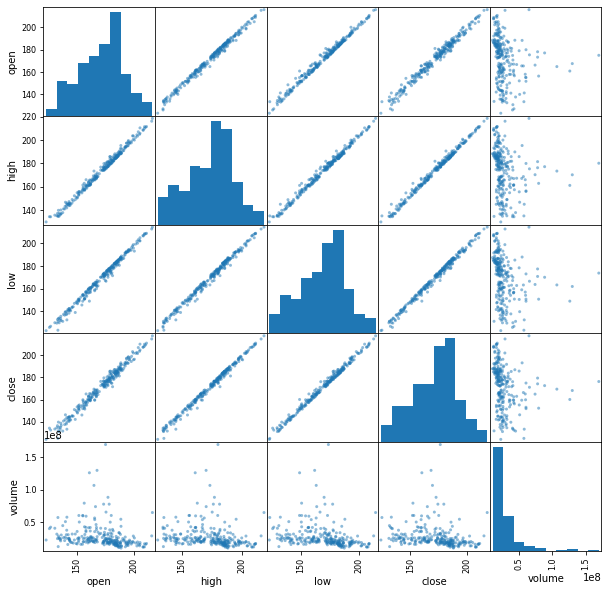

In [3]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb,figsize=(10,10))
plt.show()

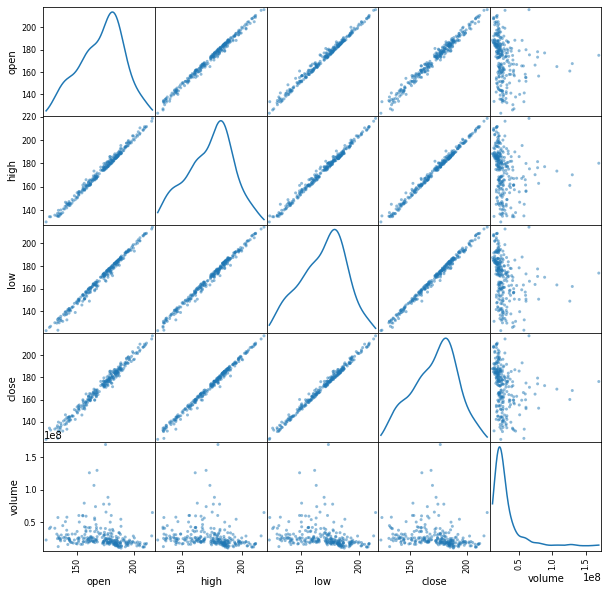

In [4]:
scatter_matrix(fb,figsize=(10,10),diagonal='kde')
plt.show()

In [5]:
from pandas.plotting import lag_plot

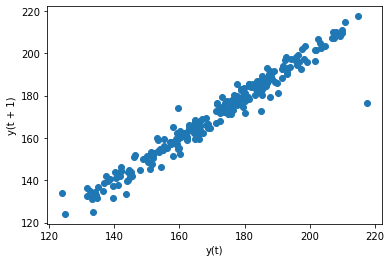

In [6]:
lag_plot(fb.close)

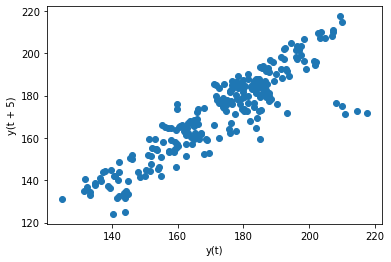

In [7]:
lag_plot(fb.close,lag=5)

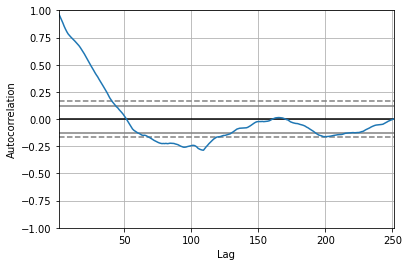

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fb.close)

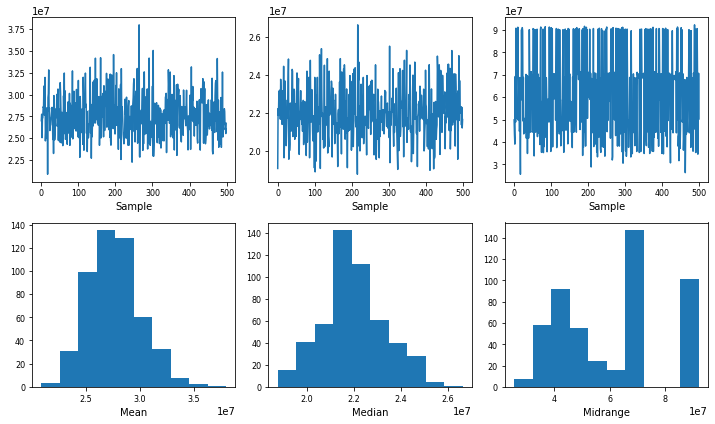

In [9]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(
    fb.volume,fig=plt.figure(figsize=(10,6))
)

In [10]:
import seaborn as sns

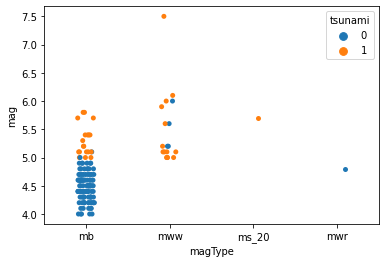

In [11]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data = quakes.query('parsed_place=="Indonesia"')
)

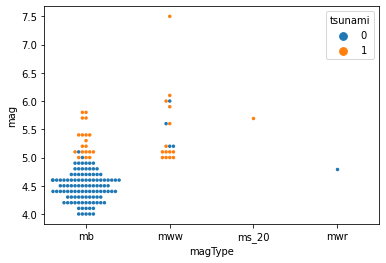

In [12]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data = quakes.query('parsed_place=="Indonesia"'),
    size=3.5
)

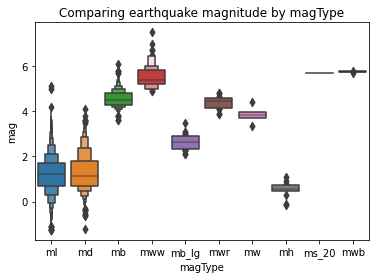

In [13]:
sns.boxenplot(
    x='magType',y='mag',data=quakes[['magType','mag']]
)
plt.title('Comparing earthquake magnitude by magType')
plt.show()

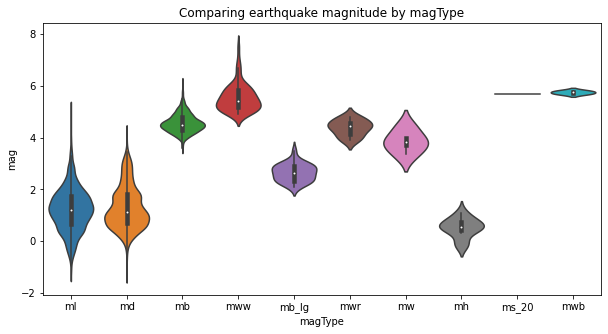

In [14]:
fig,axes = plt.subplots(figsize=(10,5))
sns.violinplot(
    x='magType',y='mag',data=quakes[['magType','mag']],
    ax=axes,scale='width'
)
plt.title('Comparing earthquake magnitude by magType')
plt.show()

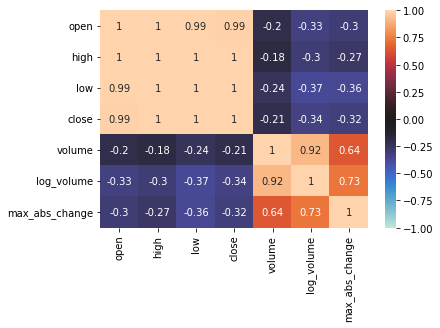

In [15]:
import numpy as np
sns.heatmap(
    fb.sort_index().assign(
        log_volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    ).corr(),
    annot=True,
    center=0,
    vmin=-1,
    vmax=1
)

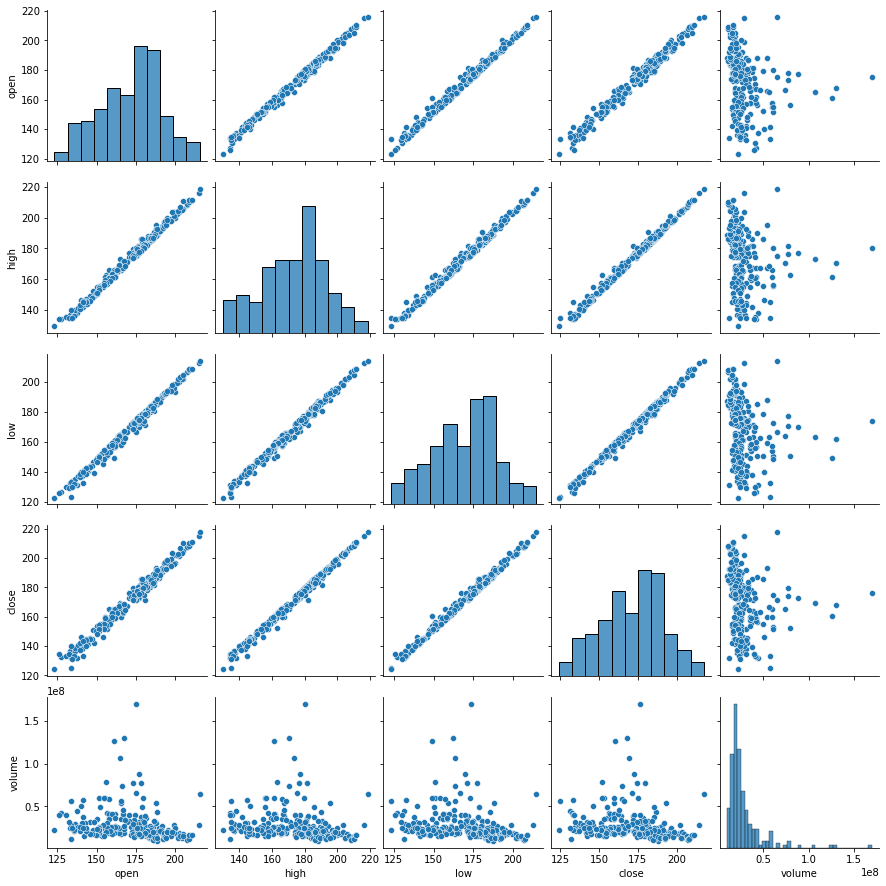

In [16]:
sns.pairplot(fb)

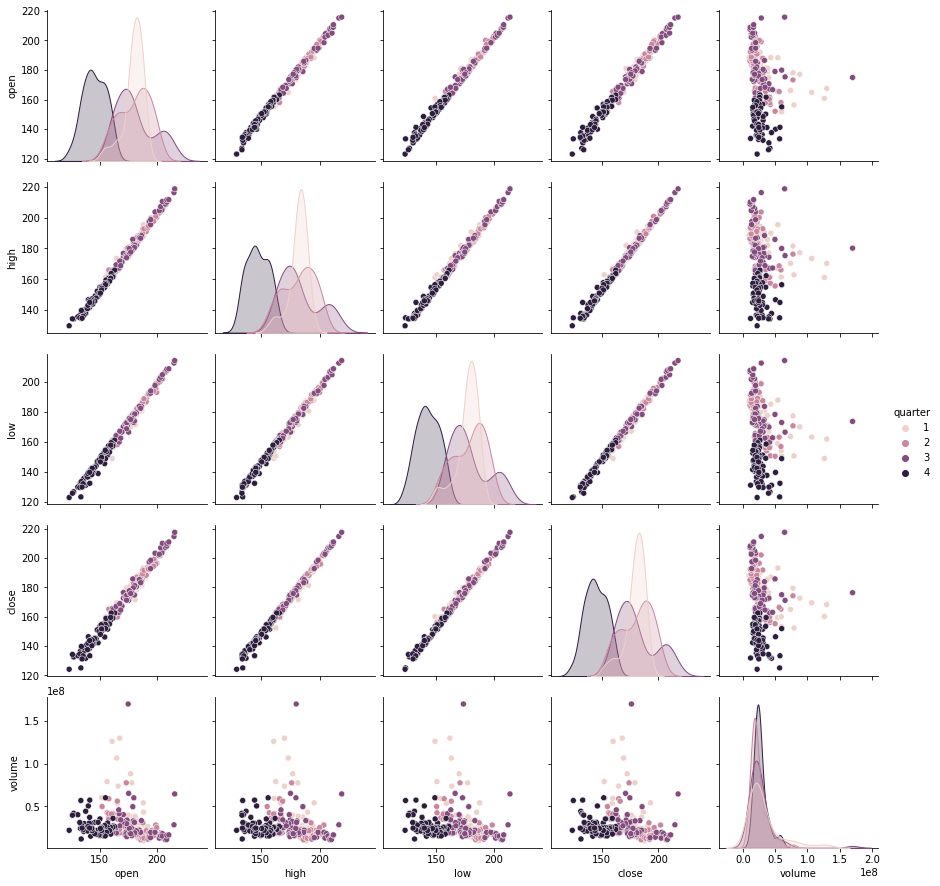

In [17]:
sns.pairplot(
    fb.assign(quarter=lambda x:x.index.quarter),
    diag_kind = 'kde',hue='quarter'
)

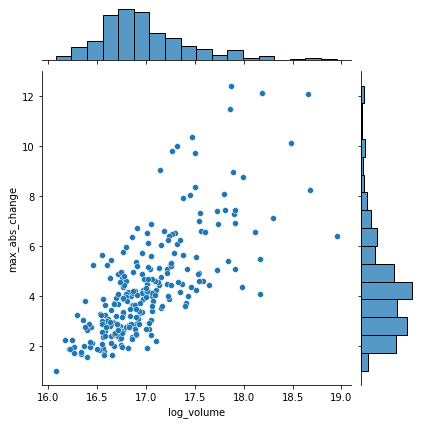

In [18]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume = np.log(fb.volume),
        max_abs_change = fb.high-fb.low
    )
)

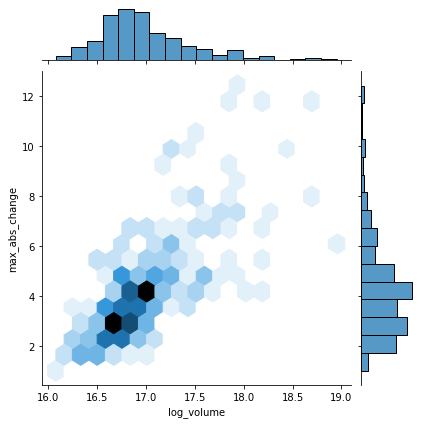

In [19]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='hex',
    data = fb.assign(
        log_volume = np.log(fb.volume),
        max_abs_change = fb.high-fb.low
    )
)

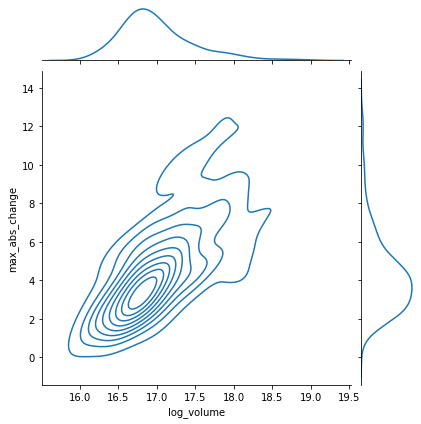

In [20]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='kde',
    data = fb.assign(
        log_volume = np.log(fb.volume),
        max_abs_change = fb.high-fb.low
    )
)

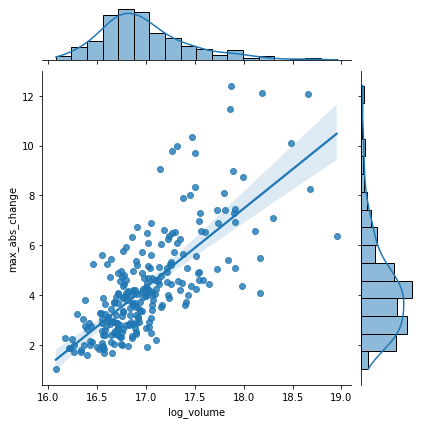

In [21]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='reg',
    data = fb.assign(
        log_volume = np.log(fb.volume),
        max_abs_change = fb.high-fb.low
    )
)

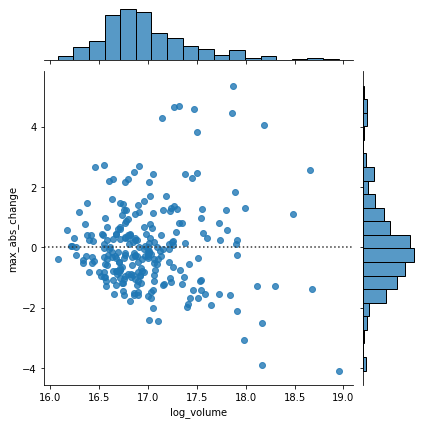

In [22]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='resid',
    data = fb.assign(
        log_volume = np.log(fb.volume),
        max_abs_change = fb.high-fb.low
    )
)

In [23]:
#Regression Plots
fb_reg_data = fb.assign(
    log_volume = np.log(fb.volume),
    max_abs_change = fb.high-fb.low
).iloc[:,-2:]

In [24]:
import itertools

In [25]:
iterator = itertools.repeat("I'm an iterator",1)
for i in iterator:
  print(f'-->{i}')
  

-->I'm an iterator


In [44]:
def reg_resid_plots(data):
 """
 Using `seaborn`, plot the regression and residuals plots 
 side-by-side for every permutation of 2 columns in data.
 Parameters:
 - data: A `pandas.DataFrame` object
 Returns:
 A matplotlib `Axes` object.
 """
 num_cols = data.shape[1]
 permutation_count = num_cols * (num_cols - 1)
 fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))
 for (x, y), axes, color in zip(
   itertools.permutations(data.columns, 2), 
  ax,
  itertools.cycle(['royalblue', 'darkorange'])
  ):
    for subplot, func in zip(
    axes, (sns.regplot, sns.residplot)
    ):
      func(x=x, y=y, data=data, ax=subplot, color=color)
      if func == sns.residplot:
        subplot.set_ylabel('residuals')
 return fig.axes

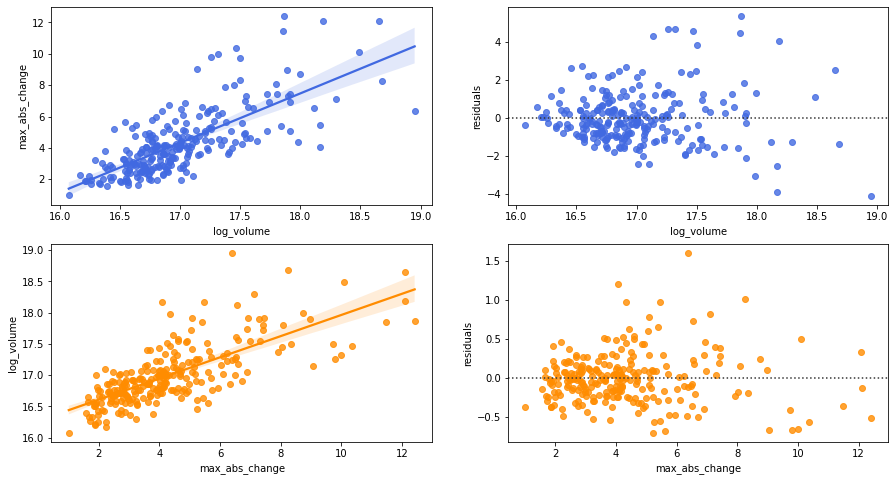

In [45]:
reg_resid_plots(fb_reg_data)

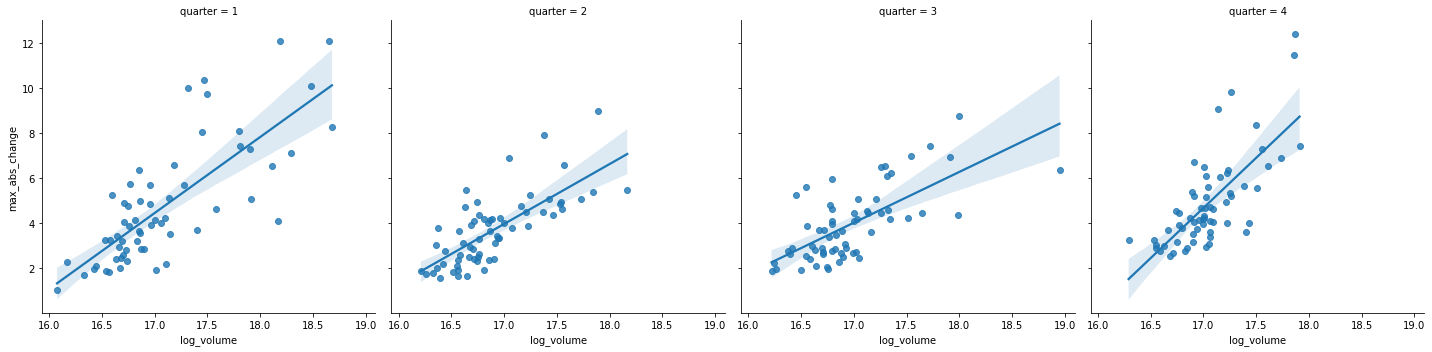

In [46]:
sns.lmplot(
    x='log_volume',
    y='max_abs_change',
    col='quarter',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change = fb.high-fb.low,
        quarter = lambda x:x.index.quarter
    )
)

In [68]:
covid= pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/covid19_cases.csv').assign(
    date = lambda x:pd.to_datetime(x.dateRep,format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America','USA'
).sort_index()['2020-01-18':'2020-09-18']

Text(0, 0.5, 'price {$}')

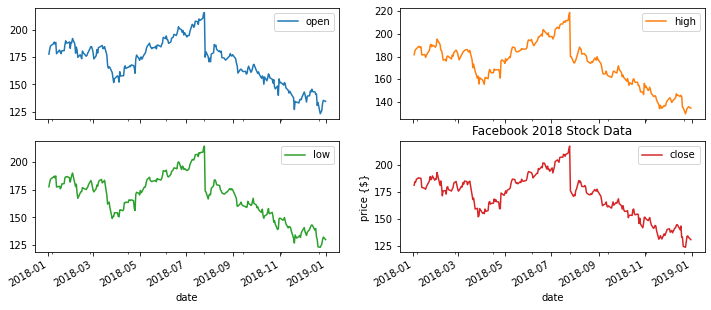

In [69]:
fb.iloc[:,:4].plot(subplots=True,layout=(2,2),figsize=(12,5))
plt.title('Facebook 2018 Stock Data')
plt.ylabel('price {$}')

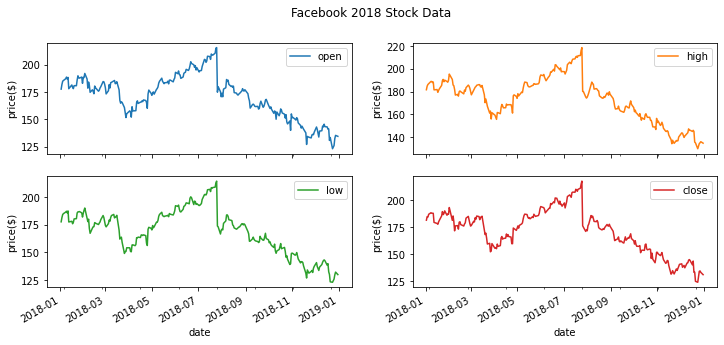

In [70]:
axes = fb.iloc[:,:4].plot(subplots=True,layout=(2,2),figsize=(12,5))
plt.suptitle('Facebook 2018 Stock Data')
for ax in axes.flatten():
  ax.set_ylabel('price($)')

Text(0, 0.5, 'price ($)')

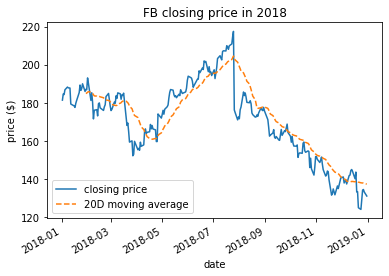

In [71]:
fb.assign(
    ma=lambda x:x.close.rolling(20).mean()
).plot(
    y=['close','ma'],
    title='FB closing price in 2018',
    label=['closing price','20D moving average'],
    style=['-','--']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

In [72]:
new_cases = covid.reset_index().pivot(
    index='date',
    columns='countriesAndTerritories',
    values='cases'
).fillna(0)

pct_new_cases = new_cases.apply(
    lambda x:x/new_cases.apply('sum',axis=1),axis=0
)[
  ['Italy','China','Spain','USA','India','Brazil']
].sort_index(axis=1).fillna(0)

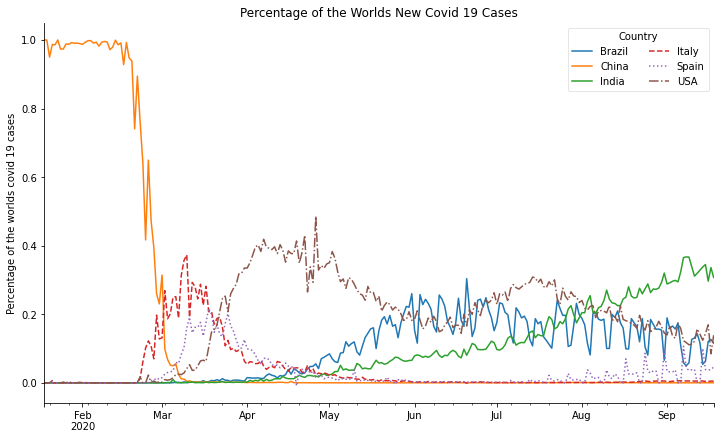

In [74]:
ax=pct_new_cases.plot(
    figsize=(12,7),
    style=['-'] * 3 + ['--',':','-.'],
    title='Percentage of the Worlds New Covid 19 Cases'
)
ax.legend(title='Country',framealpha=0.5,ncol=2)
ax.set_xlabel('')
ax.set_ylabel('Percentage of the worlds covid 19 cases')

for spine in ['top','right']:
  ax.spines[spine].set_visible(False)

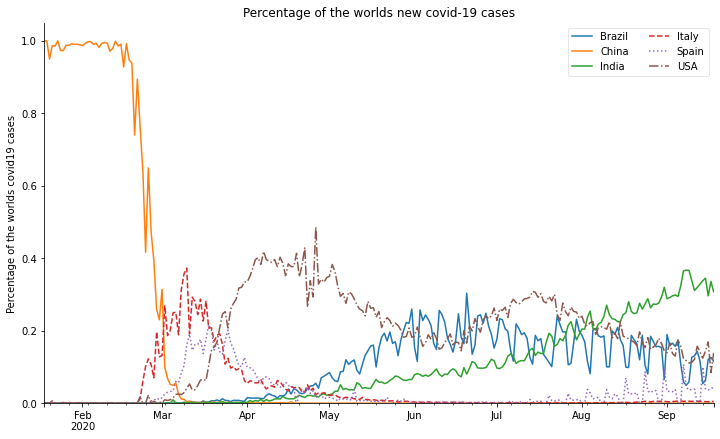

In [79]:
ax=pct_new_cases.plot(
    figsize=(12,7),
    style=['-']*3 + ['--',':','-.'],
    title='Percentage of the worlds new covid-19 cases'
)
ax.legend(framealpha=0.5,ncol=2)
ax.set_xlabel('')
ax.set_ylabel('Percentage of the worlds covid19 cases')
ax.set_ylim(0,None)

for spine in ['top','right']:
  ax.spines[spine].set_visible(False)

In [95]:
!pip install mplfinance

     |████████████████████████████████| 70 kB 3.6 MB/s 


E: Unable to locate package stock_analysis
